# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import operator

import imageio
import glob

# 2. Write Function

In [2]:
def LoR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [3]:
def LoR_find_W_local_mul_class(X, Y, epoch = 1000, lr = 1):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    K = Y.shape[1]
    W = np.random.randn(D_1, K)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        Yhat = LoR_find_Yhat_mul_class(X, W)
        error = (-Y*np.log(Yhat)).sum()
        error_list.append(error)
        S = np.dot(Xb.T, Y-Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [4]:
def LoR_find_W_local(X, Y, epoch = 1000, lr = 1):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        Yhat = LoR_find_Yhat(X, W)
        # error = find_error_bin_class(Y, np.round(Yhat, 0))
        error = (-Y*np.log(Yhat) - (1 - Y)*np.log(1 - Yhat)).sum()
        error_list.append(error)
        S = np.dot(Xb.T, Y - Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [5]:
def LoR_find_Yhat_mul_class(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = np.exp(Z)/np.exp(Z).sum(axis=1, keepdims = True)
    return Yhat

In [6]:
def find_error_mul_class(Y, Yhat):
    N = Y.shape[0]
    Y_argmax = np.argmax(Y, axis=1)
    Yhat_argmax = np.argmax(Yhat, axis=1)
    error = 100*(Y_argmax != Yhat_argmax).sum()/N
    return error

In [7]:
def create_onehot_target(label):
    K = len(np.unique(label))
    N = label.shape[0]
    onehot = np.zeros([N, K])
    for i in range(N):
        onehot[i, label[i, 0]] = 1
    return onehot

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333333, 0.3333, 0.3333])

# 3. Read Data & Prepare Data

In [9]:
glob.glob("train/*.jpg")

['train\\p005738_0.JPG',
 'train\\p005752_0.JPG',
 'train\\p005801_0.JPG',
 'train\\p005812_0.JPG',
 'train\\p005839_0.JPG',
 'train\\p005848_0.JPG',
 'train\\p005855_0.JPG',
 'train\\p005905_0.JPG',
 'train\\p005913_0.JPG',
 'train\\p005930_0.JPG',
 'train\\p005941_0.JPG',
 'train\\p005950_0.JPG',
 'train\\p005959_0.JPG',
 'train\\p010007_0.JPG',
 'train\\p010013_0.JPG',
 'train\\p010021_0.JPG',
 'train\\p010029_0.JPG',
 'train\\p010034_0.JPG',
 'train\\p010039_0.JPG',
 'train\\p010046_0.JPG',
 'train\\p010054_0.JPG',
 'train\\p010102_0.JPG',
 'train\\p010113_0.JPG',
 'train\\p010117_0.JPG',
 'train\\p010122_0.JPG',
 'train\\p010126_0.JPG',
 'train\\p010134_0.JPG',
 'train\\p010145_0.JPG',
 'train\\p010151_0.JPG',
 'train\\p010157_0.JPG',
 'train\\p010203_0.JPG',
 'train\\p010213_0.JPG',
 'train\\p010226_0.JPG',
 'train\\p010237_0.JPG',
 'train\\p010243_0.JPG',
 'train\\p010342_1.JPG',
 'train\\p010346_0.JPG',
 'train\\p010350_0.JPG',
 'train\\p010356_0.JPG',
 'train\\p010405_0.JPG',


In [10]:
image_train = np.empty((0,2304), int) #2304
label_train = np.empty((0,1), int)

num_train = 582 #582
i = 0
for image_path in glob.glob("train/*.jpg"):
    image = imageio.imread(image_path)
    image = rgb2gray(image) #for converse to GRAY picture
    image = np.array(image)
    image = image.reshape(1, -1)
    image_train = np.vstack((image_train, image))
    
    label = int(image_path[::-1][4])
    label_train = np.vstack((label_train, label))
    
    i += 1
    if i >= num_train:
        break

print(image_train.shape)
print(label_train.shape)

(582, 2304)
(582, 1)


In [11]:
X_Train = image_train/255
Y_Train = create_onehot_target(label_train)

In [12]:
image_test = np.empty((0,2304), int) #2304
label_test = np.empty((0,1), int)

num_test = 100 #100
i = 0
for image_path in glob.glob("test/*.jpg"):
    image = imageio.imread(image_path)
    image = rgb2gray(image) #for converse to GRAY picture
    image = np.array(image)
    image = image.reshape(1, -1)
    image_test = np.vstack((image_test, image))
    
    label = int(image_path[::-1][4])
    label_test = np.vstack((label_test, label))
    
    i += 1
    if i >= num_test:
        break

print(image_test.shape)
print(label_test.shape)

(100, 2304)
(100, 1)


In [13]:
X_Test = image_test/255
Y_Test = create_onehot_target(label_test)

# 4. Create Model

In [14]:
W, error_list = LoR_find_W_local_mul_class(X_Train, Y_Train)

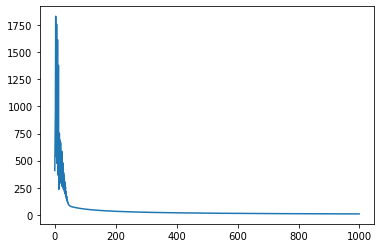

In [15]:
plt.plot(error_list)

In [16]:
Yhat_Train = LoR_find_Yhat_mul_class(X_Train, W)

In [17]:
error_Train = find_error_mul_class(Y_Train, Yhat_Train)

In [18]:
error_Train

0.0

# 5. Make Prediction

In [19]:
Yhat_Test = LoR_find_Yhat_mul_class(X_Test, W)

In [20]:
error_Test = find_error_mul_class(Y_Test, Yhat_Test)

In [21]:
error_Test

0.0

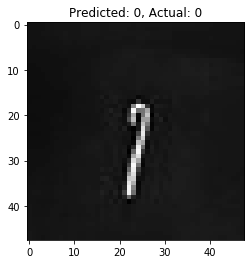

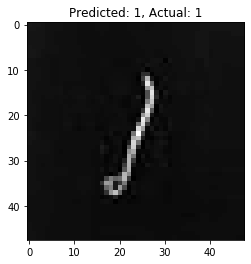

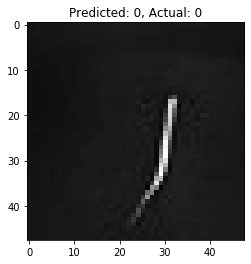

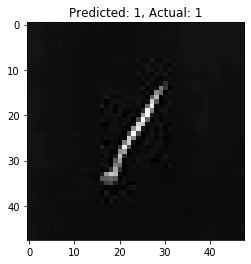

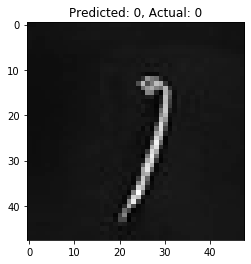

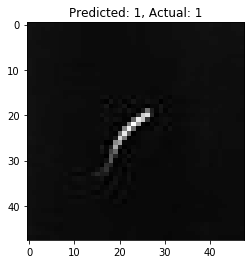

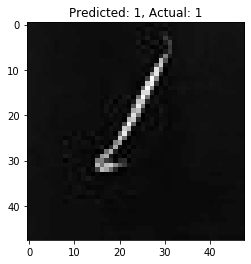

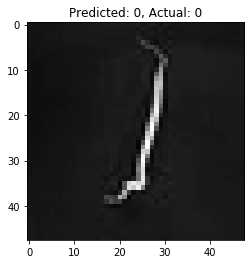

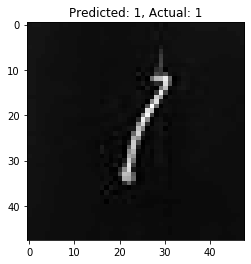

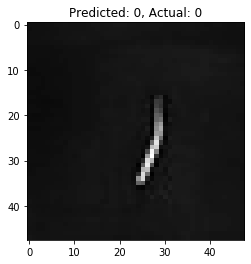

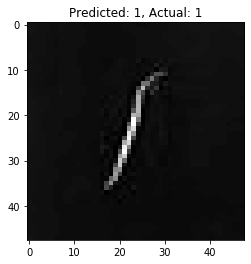

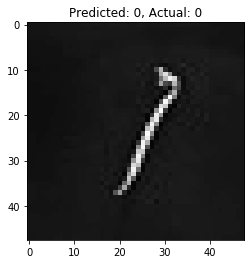

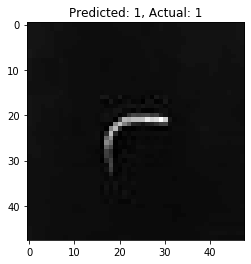

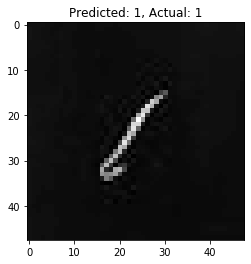

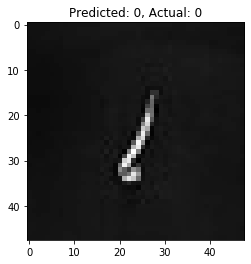

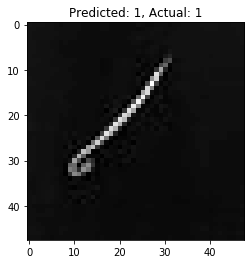

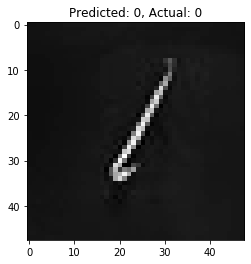

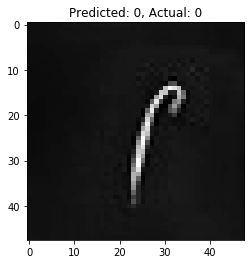

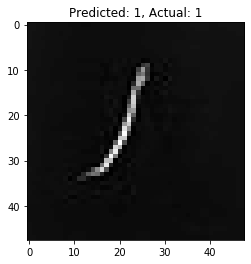

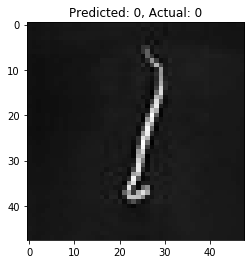

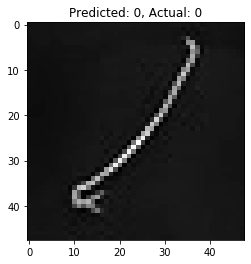

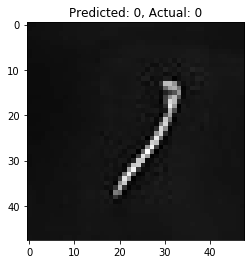

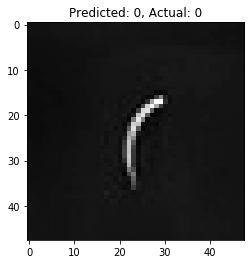

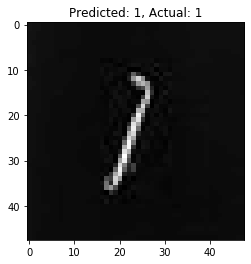

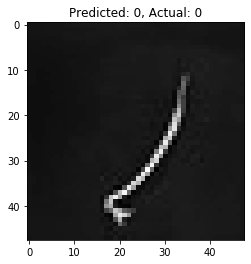

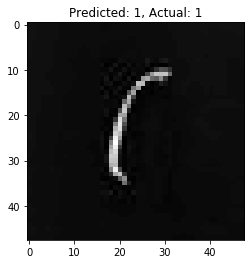

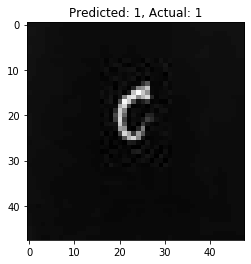

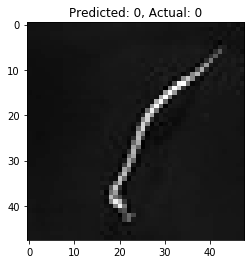

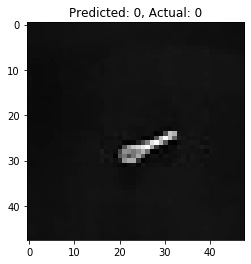

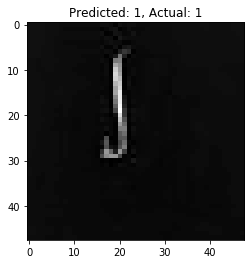

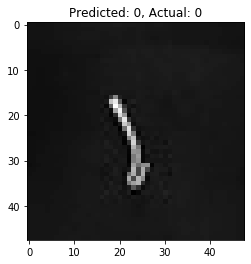

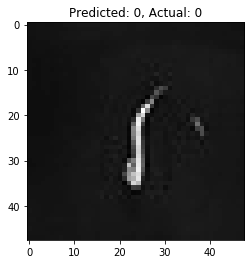

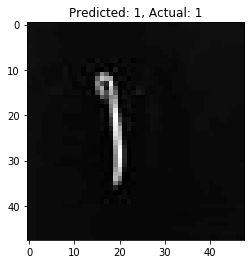

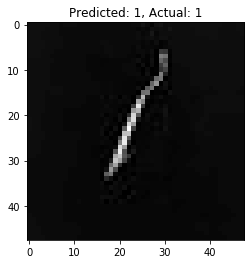

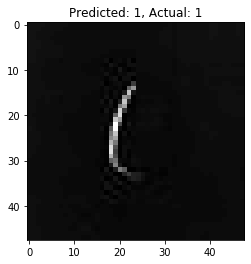

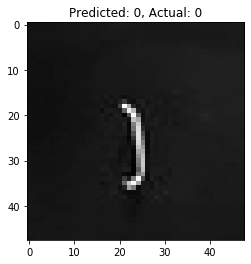

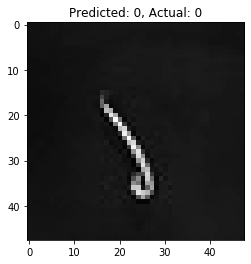

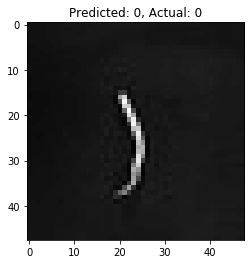

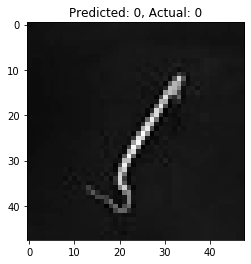

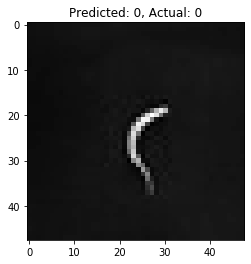

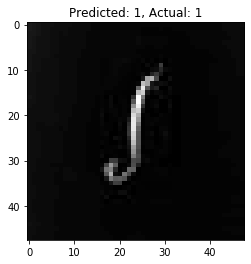

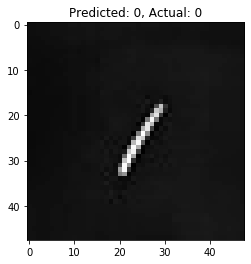

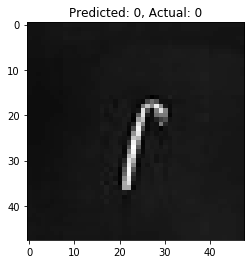

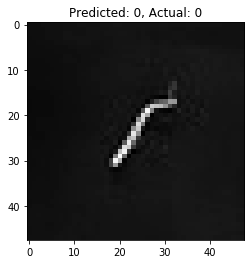

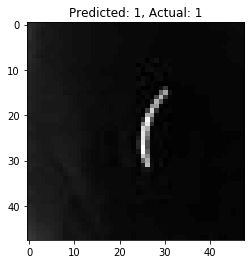

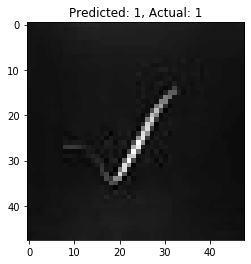

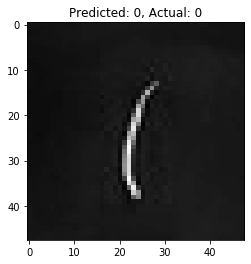

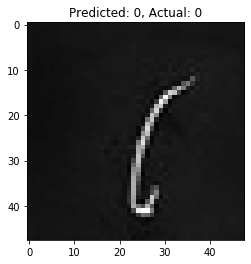

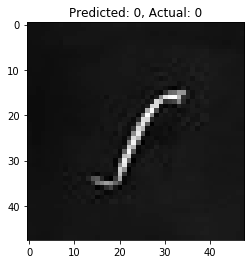

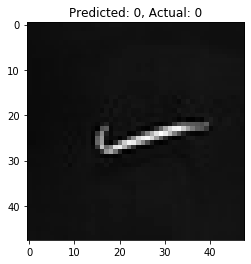

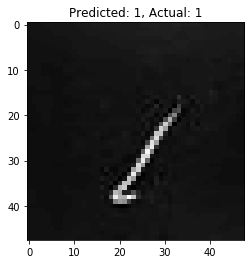

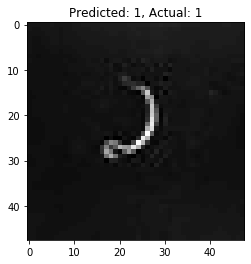

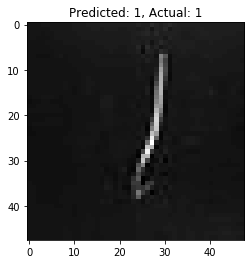

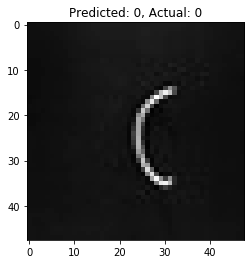

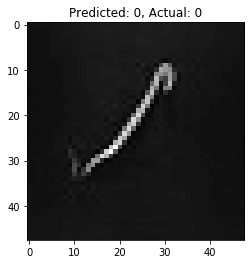

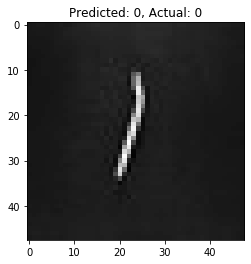

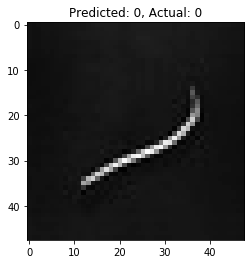

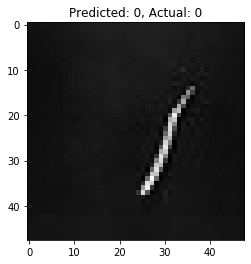

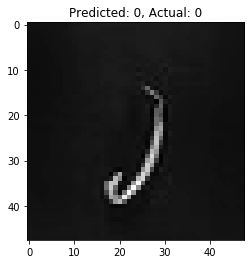

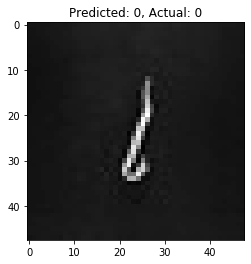

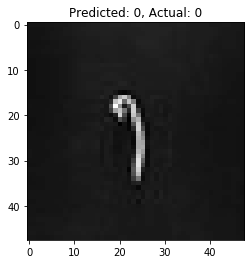

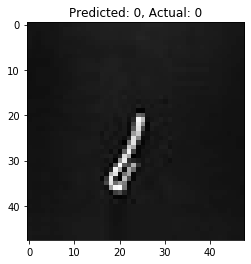

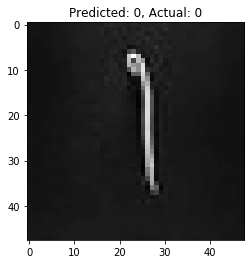

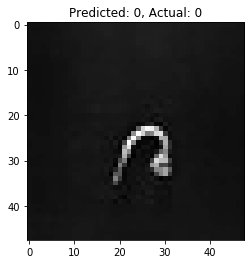

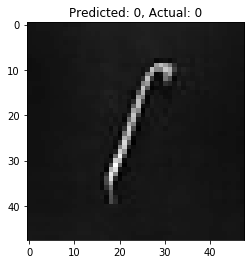

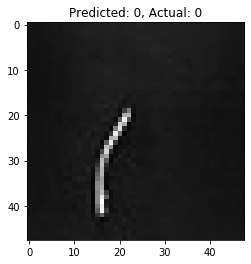

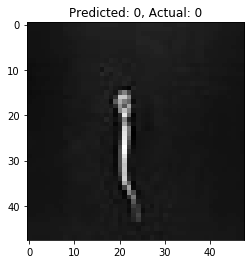

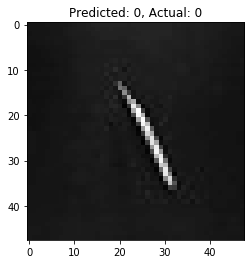

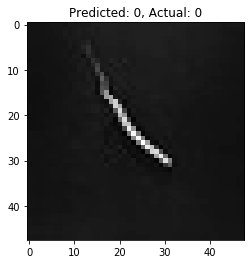

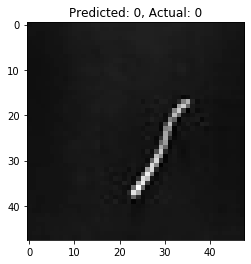

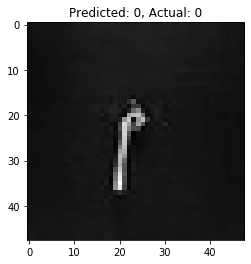

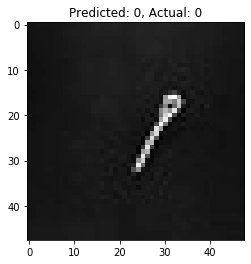

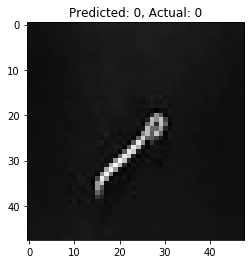

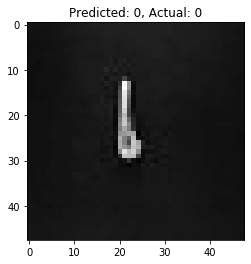

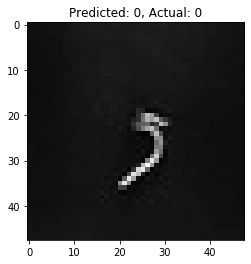

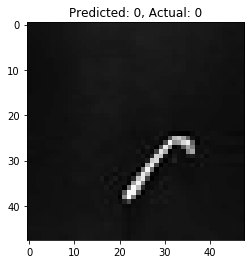

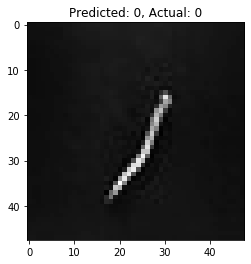

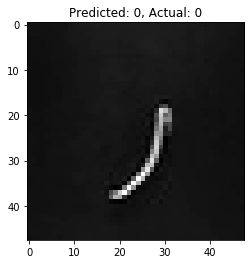

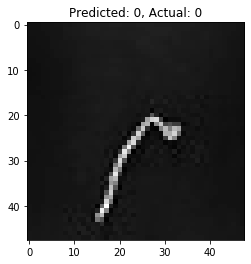

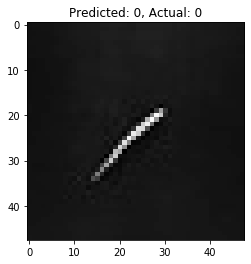

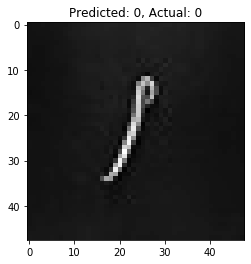

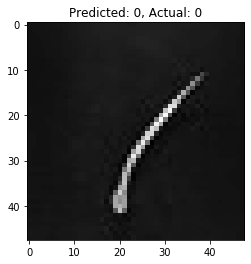

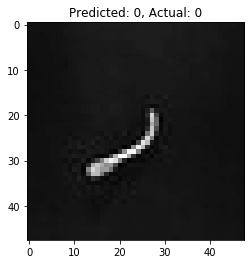

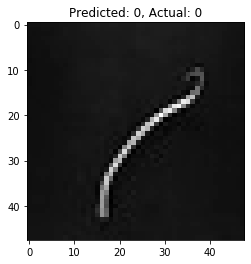

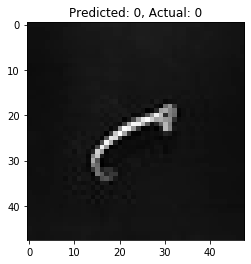

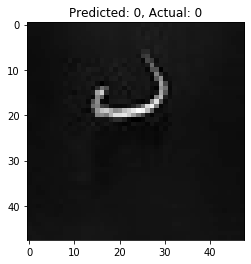

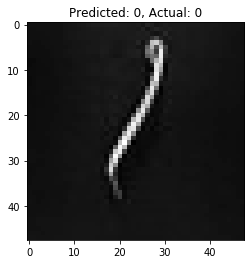

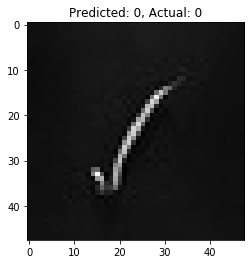

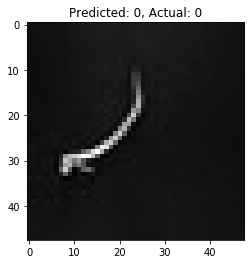

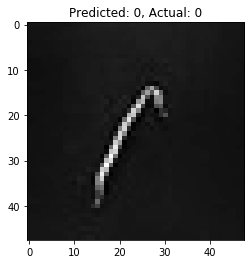

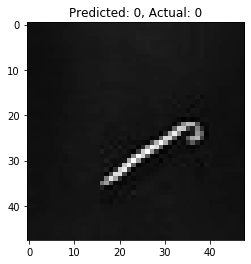

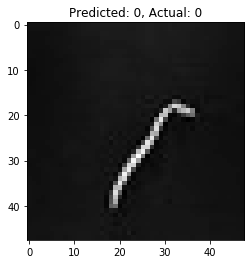

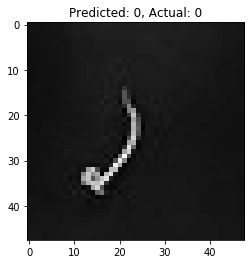

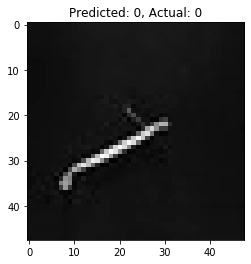

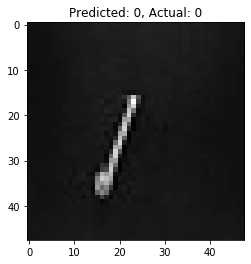

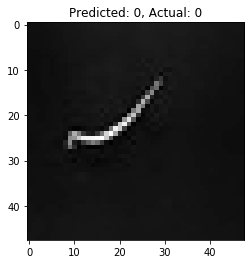

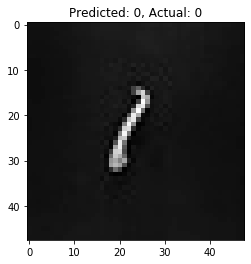

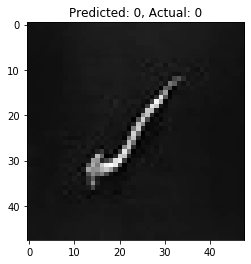

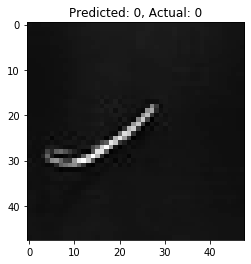

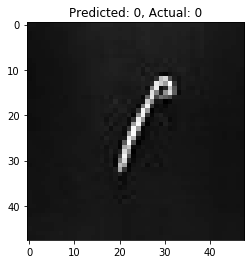

In [22]:
num_test = 100 #100

for i, image_path in enumerate(glob.glob("test/*.jpg")):
    image = imageio.imread(image_path)
    image = rgb2gray(image) #use for converse to GRAY picture only
    image = np.array(image)
    
    label = int(image_path[::-1][4])
    
    predicted = np.argmax(Yhat_Test, axis=1)[i]
    
    plt.title('Predicted: {}, Actual: {}'.format(predicted, label))
    plt.imshow(image, cmap='gray')
    plt.show()
    
    if i >= num_test - 1:
        break